# Algebra Library

This free algebra library creates a way for you to represent equations within a term algebra. It doesn't assume any properties in the algebra and it has a way to create a DAG containing only unique instances of the terms. The idea is that this library is supposed to be used for Unification algorithms.

## Setting up

In [1]:
from symcollab.algebra import *

It's recommended that you set up your constants, variables, and functions ahead of time

In [2]:
f = Function("f", arity = 2)
g = Function("g", 2)
x = Variable("x")
y = Variable("y")
z = Variable("z")
a = Constant("a")
b = Constant("b")
c = Constant("c")
d = Constant("d")
e = Constant("e")

The functions `f` and `g` are not terms by themselves. You need to instantiate them with their arguments.

In [3]:
f1 = f(x, a)
g1 = f(a, b)

You can print terms

In [4]:
print(f1)

f(x, a)


If you try to instantiate a term from a function with the incorrect number of arguments, you'll get an error

In [5]:
try:
    f2 = f(x, x, x)
    print(f2)
except:
    print("Error Occured")

Error Occured


The arguments of a term can be obtained by calling `.arguments`. This makes it easy to iterate over them. 

In [7]:
for ti in g1.arguments:
    print(ti)

a
b


You can check if a term is a Constant, Variable, or FuncTerm by using `isinstance`

In [8]:
print("Is x a variable?", isinstance(g, Variable))
print("Is x a constant?", isinstance(x, Constant))
print("Is a a variable?", isinstance(a, Variable))
print("Is a a constant?", isinstance(a, Constant))

Is x a variable? False
Is x a constant? False
Is a a variable? False
Is a a constant? True


You can check to see if two terms are exactly the same. (Not the same as unifiable)

In [9]:
f(x, a) == f(x, a)

True

In [10]:
f(x, a) == f(y, a)

False

It's easy to check if a term exists within another term

In [11]:
x in f(x, a)

True

In [12]:
y in f(x, a)

False

You can pull out all the variables, constants, or both out of an expression

In [13]:
term = f(f(x,a), f(y, f(x,b)))
print("Constants: ", get_constants(term))
print("Variables: ", get_vars(term))
print("All: ", get_vars_or_constants(term))

Constants:  [a, b]
Variables:  [x, y, x]
All:  [x, a, y, x, b]


This is useful for when you want to count occurances

In [14]:
from collections import Counter
print(Counter(get_vars(term)))

Counter({x: 2, y: 1})


If you just want unique occurances, add `unique=True` flag

In [15]:
print("Distinct Variables: ", get_vars(term, unique = True))

Distinct Variables:  {y, x}


## Equations

Equations are currently only a container that holds two terms

In [16]:
e1 = Equation(f1, g1)
print(e1)

f(x, a) = f(a, b)


## TermDAG

Most of the functionality in the library is in the DAG implementation. The goal of this library is to represent terms in a DAG such that structured is shared and each subterm appears only once.

In [18]:
from symcollab.algebra.dag import TermDAG

In [19]:
dag1 = TermDAG(f(g(a, x), b))

You can visualize the DAGs

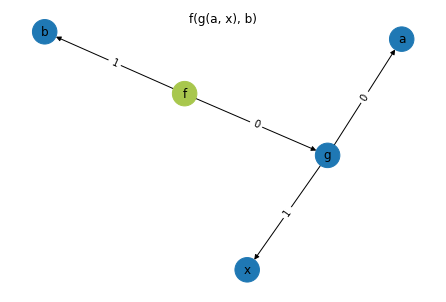

In [20]:
dag1.show()

Some notes:
- The edges are annotated with which argument position the term is in.
- The root node is colored green.
- The whole term is listed on the top

You can traverse the graph with the following function calls

In [21]:
# Depth First Edge Traversal
## Returns a list of edges (node, node)
t1 = dag1.df_edge_traversal()

# Depth First Node Traversal
## Returns a list of nodes
t2 = dag1.df_node_traversal()

# Breadth First Edge Traversal
## Returns a list of edges (node, node)
t3 = dag1.bs_edge_traversal()

# Breadth First Node Traversal
## Returns a list of nodes
t4 = dag1.bs_node_traversal()

Then to traversal, just use the standard Python notation

In [22]:
for edge in t1:
    print(edge)

(f(g(a, x), b), g(a, x))
(g(a, x), a)
(g(a, x), x)
(f(g(a, x), b), b)


## Substitutions

Currently substitutions are supported for Terms (not TermDAGs)
Substitutions are stored and then applied to a term via multiplication

In [23]:
sigma = SubstituteTerm()
sigma.add(x, f(a, b)) # Add the mapping x -> f(a,b)
sigma.add(y, a)
sigma.add(z, c)
print(sigma)

{
  x ↦ f(a, b),
  y ↦ a,
  z ↦ c
}


In [24]:
# Apply the substitution to the term f(x, b)
f(x, b) * sigma

f(f(a, b), b)

In [25]:
sigma(f(x,b))

f(f(a, b), b)

### Useful Methods

Replace a substitution

In [26]:
sigma.replace(x, b)
print(sigma)

{
  x ↦ b,
  y ↦ a,
  z ↦ c
}


Delete a substitution

In [27]:
sigma.remove(x)
print(sigma)

{
  y ↦ a,
  z ↦ c
}


Get the domain and range of a substiution

In [28]:
print("Domain: ", sigma.domain())
print("Range: ", sigma.range())

Domain:  [z, y]
Range:  [c, a]


### Composing Substitutions

You can compose substitutions $\sigma_1$ and $\sigma_2$.

In [29]:
sigma1 = SubstituteTerm()
sigma1.add(x, f(y, a))
sigma2 = SubstituteTerm()
sigma2.add(y, b)
print(sigma1 * sigma2)

{
  x ↦ f(b, a),
  y ↦ b
}


As you can see above, the substitutions in $\sigma_2$ got applied to $\sigma_1$. You can still apply it to a term in the same line.

In [30]:
g(x,b) * sigma1 * sigma2

g(f(b, a), b)

## Example Usage

Lets use our new-found knowledge to create a small algorithm: counting the occurances of a subterm within a term.

In [31]:
def count_occurence(subterm: Term, term: Term):
    if subterm == term:
        return 1
    if isinstance(term, (Variable, Constant)):
        return 0
    count = 0
    for t in term.arguments:
        count += count_occurence(subterm, t)
    return count

In [32]:
f = Function("f", 2)
h = Function("h", 1)
x = Variable("x")
count_occurence(h(x), f(h(x), f(x, h(x))))

2